<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/12_kMean_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# 1 . Load data

In [2]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

Cloning into 'DS102.K21'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 420 (delta 53), reused 0 (delta 0), pack-reused 305
Receiving objects: 100% (420/420), 4.55 MiB | 3.73 MiB/s, done.
Resolving deltas: 100% (228/228), done.


In [0]:
data = pd.read_csv('DS102.K21/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
X = data.iloc[:,[3,4]].values

Text(0.5, 1.0, 'Annual Income vs Spending Score')

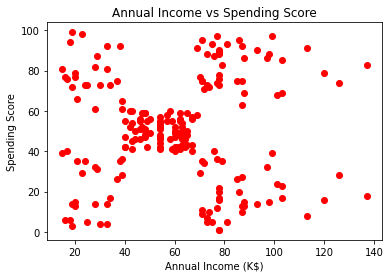

In [8]:
plt.scatter(X[:,0], X[:,1], color = 'red')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')

# 2 . Build and Train model

Text(0.5, 1.0, 'The Elbow Method')

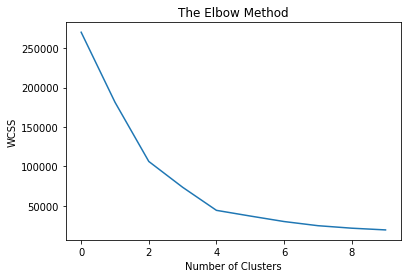

In [11]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')

In [0]:
kmeans = KMeans(n_clusters = 5, random_state = 0)

In [0]:
y_kmeans = kmeans.fit_predict(X)

# 3 . Visualize result

In [0]:
raw_colors = ('red', 'green', 'black', 'cyan', 'magenta')
colors = ListedColormap(raw_colors)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

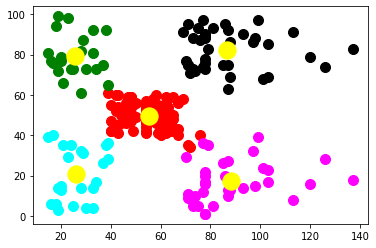

In [18]:
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colors(i))
X_clusters = kmeans.cluster_centers_[:,0]
y_clusters = kmeans.cluster_centers_[:,1]
plt.scatter(X_clusters, y_clusters, s = 300, c = 'yellow')